# Cat vs Non-Cat Classifier - Numpy

## Slide 1

### Project - Cat vs Non-cat Classifier

#### About the Project

In this project, you will build a cat vs non-cat classifier using a neural network. You are given a set of images of cats and other animals. You have to build a neural network to classify the given image as cat or non-cat

#### About the Dataset

Dataset is located at `datasets`

Dataset is in .h5 file. It is a file format which could store the data - along with its meta-data - in the form of a heirarchy. More about this <a href="https://www.youtube.com/watch?v=q14F3WRwSck">here</a>.
Import h5py to interact with a dataset that is stored in an H5 file. It contains

1. train_catvnoncat.h5 - a training set of images labeled as cat (y=1) or non-cat (y=0)
2. test_catvnoncat.h5 - a test set of images labeled as cat or non-cat
3. Each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px)

## Slide 2
### Project - Cat vs Non-cat Classifier - Import Packages

Let's start the project. Import all the required packages.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

## Slide 3
### Project - Cat vs Non-cat Classifier - Loading the data

Now, let us load the dataset into our working session.

In [ ]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
print("File format of train_dataset:",train_dataset)
print("File format of test_dataset:",test_dataset)

File format of train_dataset: <HDF5 file "train_catvnoncat.h5" (mode r)>
File format of test_dataset: <HDF5 file "test_catvnoncat.h5" (mode r)>


 As discussed, the data is of heirarchial format. So we could just access the data as follows:

In [ ]:
# Load training data
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

In [ ]:
# Load test data
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

Let us now seperate some samples from the test data for validation purposes.

In [ ]:
# test_set_x_orig.shape
validation_x = test_set_x_orig[:25]
validation_y = test_set_y_orig[:25]
print("Validation data size: ",validation_x.shape)
test_set_x_orig = test_set_x_orig[25:]
test_set_y_orig = test_set_y_orig[25:]
print("Test data size: ",test_set_x_orig.shape)

Validation data size:  (25, 64, 64, 3)
Test data size:  (25, 64, 64, 3)


In [ ]:
len(test_set_x_orig.shape)

4

## Slide 4
### Project - Cat vs Non-cat Classifier - Visualize the Data

The classes of the images in the datasets are cat and non-cat. These labels of each sample are stored in <code>train_set_y_orig</code> and <code>test_set_y_orig</code>, where 1 means 'cat' and 0 means 'non-cat'. Let us see how to get this info Pythonically:

Classes are:  [b'non-cat' b'cat']
Groundtruth stored as:  1
cat


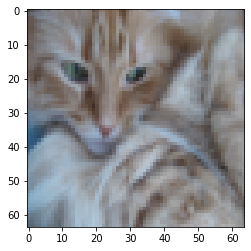

In [ ]:
classes = np.array(test_dataset["list_classes"][:])
print("Classes are: ",classes)
print("Groundtruth stored as: ",train_set_y_orig[2])
print(classes[train_set_y_orig[2]].decode('utf-8'))
plt.imshow(train_set_x_orig[2])

In [ ]:
arr = np.arange(1,5)
print(arr.shape)
arr=arr.reshape(1,2,2)
print(arr.shape)
arr_squeezed = np.squeeze(arr)
print(arr_squeezed.shape)
arr_squeezed

(4,)
(1, 2, 2)
(2, 2)


array([[1, 2],
       [3, 4]])

The above image is plotted in the form of visual representation using matplotlib. But, the images in the dataset are actually stored in the form of numpy-array representations as follows:

In [ ]:
print("Type: ",type(train_set_x_orig[2]))
print("Shape of the image: ",train_set_x_orig[2].shape)
train_set_x_orig[2].shape

Type:  <class 'numpy.ndarray'>
Shape of the image:  (64, 64, 3)


(64, 64, 3)

## Slide 5
### Shape of the data

We need to reshape the data in way compatible to be fed to our Machine Learning Algorithm - Logistic Regression Classifier. So, let us first get the idea of how the data is actually being stored by default. 

We could get the information about the number of images, shape and configuration of each sample in the train and test datasets as follows:

In [ ]:
m_train = np.squeeze(train_set_y_orig.shape)
print("**",m_train)
m_test = np.squeeze(test_set_y_orig.shape)
num_px = train_set_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y_orig.shape))
print("Validation data size: ",validation_x.shape)
print("Validation data size: ",validation_y.shape)
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y_orig.shape))

** 209
Number of training examples: m_train = 209
Number of testing examples: m_test = 25
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (209,)
Validation data size:  (25, 64, 64, 3)
Validation data size:  (25,)
test_set_x shape: (25, 64, 64, 3)
test_set_y shape: (25,)


<code>np.squeeze()</code> function is used when we want to remove single-dimensional entries from the shape of an array.<br>

From above, we observe that: 
* our train data, validation data and test data are of 209, 25 and 25 samples respectively. 
* each sample is of 64 x 64 pixels, with 3 channels (R,G,B)

## Slide 6
### MCQ about np.squeeze()

a. Create a numpy array of shape (2,1,10) and containing values from 1 to 20. Now upon using np.squeeze on this array, what would be the shape of the squeezed array?
* (1,10)
* (1,10)
* <b>(2,10)</b>
* (10,2)

In [ ]:
# Explanation
npa = np.arange(1,21).reshape(2,1,10)
print("1.",npa.ndim)
print("2.",npa.shape)
print(npa)
npa_squeezed = np.squeeze(npa)
print("3.",npa_squeezed.ndim)
print("4.",npa_squeezed.shape)
npa_squeezed

1. 3
2. (2, 1, 10)
[[[ 1  2  3  4  5  6  7  8  9 10]]

 [[11 12 13 14 15 16 17 18 19 20]]]
3. 2
4. (2, 10)


array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])

## Slide 7
###  MCQ about dimensionality

a. What is the dimensionality of each sample in the dataset?
* 1
* 2
* <b>3</b>
* 4

In [ ]:
# Explanation
train_set_x_orig[2].ndim

3

## Slide 8
### Reshaping the data

Now, let us reshape the images to a flat vector of shape (height x width x 3, 1). 
This could be done by using <code>reshape(train_set_x_orig.shape[0],-1)</code>.

-1 in reshape function is used when you dont want to explicitly tell the dimension of that axis. E.g,
Here, we want each of the 209 samples in the train set to be represented as a single vector of shape (height x width x 3).  By writing <code>train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)</code>, the array will get reshaped in such a way that the resulting array has 209 rows and this is only possible by having (height x width x 3) columns, hence, (height x width x 3,209). 

We then transpose the matrix by using <code>train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T</code>

In [ ]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
validation_x_flatten = validation_x.reshape(validation_x.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
# print ("train_set_y shape: " + str(train_set_y_orig.shape))
print ("validation_x shape: " + str(validation_x.shape))
print ("validation_x_flatten shape: " + str(validation_x_flatten.shape))
print ("validation_y shape: " + str(validation_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y_orig.shape))
# print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

validation_x shape: (25, 64, 64, 3)
validation_x_flatten shape: (12288, 25)
validation_y shape: (25,)
test_set_x_flatten shape: (12288, 25)
test_set_y shape: (25,)


Thus, we have stored the whole data-set in form of 12288 x 209. Say, first training sample could be accessed as <code>train_set_x_flatten[:,0]</code>


## Slide 9
### Feature Scaling

The values of the pixels in RGB images range from 0 to 255. So, we need to apply Scaling to these features values for our ML algorithms to work fine on them. Now the values are spread in the range of 0 to 1.

In [ ]:
print("Original Min value: ",train_set_x_flatten.reshape(1,-1).min())
print("Original Max value: ",train_set_x_flatten.reshape(1,-1).max())

Original Min value:  0
Original Max value:  255


In [ ]:
train_set_x = train_set_x_flatten / 255.
validation_set_x = validation_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [ ]:
print("Standardized Min value: ",train_set_x.reshape(1,-1).min())
print("Standardized Max value: ",train_set_x.reshape(1,-1).max())

Standardized Min value:  0.0
Standardized Max value:  1.0


## Slide 10
### Defining some utility functions

 As a workflow, we shall first define the helper functions to be used in our holistic algorithm.
 
 We are going to define the following functions.
 * Sigmoid Function - to calculate the sigmoid activation function
 * Initialize Weights - to initialize the weights and bias values to zeros, upon which we update those values through optimization
 * Propagate - for forward and backward propagation and get the gradients and costs
 * Optimize - to get the optimal weights and biases
 * Predict - to predict the labels 
 * Model - the main function to train the algorithm and get the final model for classification

## Slide 11
### Defining some utility functions - Sigmoid Function

As we know, we use sigmoid activation function in logistic regression to introduce non-linearity to the decision curve. 
All the negative extreme values will be squashed towards 0, while the positive extreme values will be squashed towards 1. The value of sigmoid(0) is 0.5. 
$$ sigmoid(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{- z} }  $$ 


In [ ]:
# Sigmoid activation function

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

Let us have a look at the graph of our sigmoid function.

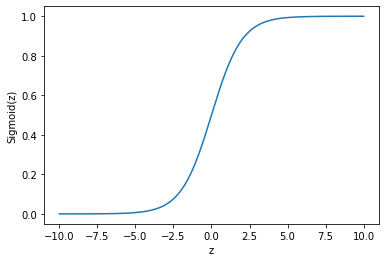

In [ ]:
z = np.linspace(-10,10,2000000) 
sigmoid_z = sigmoid(z)
  
plt.plot(z, sigmoid_z) 
plt.xlabel("z") 
plt.ylabel("Sigmoid(z)") 
  
plt.show() 

## Slide 12
### Defining some utility functions - Initializing Weights

The weights should be of size (12288,1), as the shape of our dataset is (12288,209), so as to satisfy the equation <code>np.dot(w.T,X)</code>. 

In [ ]:
def initialize_with_zeros(dim):
    np.random.seed(0)
    w = np.random.rand(dim, 1)
    b = 0    
    return w, b

For example, we could get a 2-dimensional weight matrix and bias vector as follows.

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)

print("Weights: ",w)
print("Biases: ", b)

Weights:  [[0.5488135 ]
 [0.71518937]]
Biases:  0


## Slide 13
### Defining some utility functions - Propagate

The forward and backward propagation are important steps to get the gradients and costs in the process of training our algorithm.

In the forward propagation, we calculate the dot product of the feature vector,ie X and the weights matrix, and then the resultant is added with the bias vector. Next, the sigmoid function is applied to get the activations and the cost is calculated.

In backward propagation, we calculate the gradients of the weights and bias matrices.

In [ ]:
def forward_prop(w, b, X, Y):
    
    # calculate activations
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    
    # calculate cost
    m = X.shape[1]
    cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))
    cost = np.squeeze(cost)
    
    return A, cost
    

In [ ]:
def back_prop(X, A, Y):
    
    # calculate gradients for w,b
    m = X.shape[1]
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    
    grads = {'dw': dw, 'db': db}
    
    return grads

In [ ]:
def propagate(w, b, X, Y):
    
    #Forward propagation
    A, cost = forward_prop(w, b, X, Y)
    print(A)
    
    #Backward propagation
    grads = back_prop(X, A, Y)
    
    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

[[0.99987661 0.99999386]]
dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


## Slide 14
### Defining some utility functions - Predict

This function predicts the labels of the dataset by calling the sigmoid function.

The prediction for a sample is given out as
* 1 if the sigmoid function returns a value greater than 0.5
* 0 if the sigmoid function returns a value lesser than 0.5

In [ ]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    #Compute probability vector
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
            
    return Y_prediction

In [ ]:
print(predict(w, b, X))
(predict(w, b, X)==[[1. ,1.]]).all()

[[1. 1.]]


True

## Slide 15
### Defining some utility functions - Optimize

This function implements:
* both the forward and backward propagations by calling propagate function for each iteration.
* updates the weights and bias matrices based the gradients received from the propagate function.
* predicts the labels for train and test datasets by calling the predict function
* calculates the accuracies
* returns the parameter values that yield the optimal test accuracies.

In [ ]:
def get_accuracies(Y_predicted, Y_actual):
    abs_diff = np.abs(Y_predicted - Y_actual)
    accuracy = 100 - np.mean(abs_diff) * 100
    return accuracy

In [ ]:
y_actual = np.array([1,1,1,0,1])
print("y_actual :", y_actual )

y_predicted = np.array([1,0,0,0,1])
print("y_predicted :", y_predicted )

c = np.abs(y_predicted-y_actual)
print("c:", c)

c_mean = np.mean(c)
acc = 100 - (c_mean * 100)
acc

y_actual : [1 1 1 0 1]
y_predicted : [1 0 0 0 1]
c: [0 1 1 0 0]


60.0

In [ ]:
get_accuracies(y_actual, y_predicted)==60.0

True

In [ ]:
def optimize(w, b, X, Y, X_val, Y_val, num_iterations, learning_rate):
    prev_train_accuracy=0
    prev_val_accuracy=0
    costs=[]
    epoch=0
    final_w = w
    final_b = b
    
    for i in range(num_iterations):
        
        # Get cost and gradients
        grads, cost = propagate(w, b, X, Y)
        costs.append(cost)
        
        # Get derivatives
        dw = grads['dw']
        db = grads['db']
        
        #Update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Predict trainset and validation set labels 
        Y_prediction_train = predict(w, b, X)
        Y_prediction_val = predict(w, b, X_val)
        
        # Get train and validation accuracies
        train_accuracy = get_accuracies(Y_prediction_train, Y)
        val_accuracy = get_accuracies(Y_prediction_val, Y_val)
        
        if val_accuracy > prev_val_accuracy and train_accuracy>=val_accuracy:
            print("*****************************")
            print("Epoch - {} - train accuracy: {} %".format(i,train_accuracy))
            print("Epoch - {} - val accuracy: {} %".format(i,val_accuracy))
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            prev_train_accuracy = train_accuracy
            prev_val_accuracy = val_accuracy
            epoch = i
            final_w = w
            final_b = b
            
            
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    
    optimal_values = {
        'costs': costs,
        'final w':final_w,
        'final b':final_b,
        'epoch':epoch,
        'Train accuracy':prev_train_accuracy,
        'Validation accuracy': prev_val_accuracy,
         'Y_prediction_val': Y_prediction_val,
         'Y_prediction_train': Y_prediction_train,
         'params':params,
         'grads':grads,
    }
    
    return optimal_values

In [ ]:
type(optimize(np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]]), np.array([[1,2], [3,4]]), np.array([[1, 0]]),10,0.01))==dict

[[0.99987661 0.99999386]]
*****************************
Epoch - 0 - train accuracy: 50.0 %
Epoch - 0 - val accuracy: 50.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
[[0.999867   0.99999318]]
[[0.99985664 0.99999242]]
[[0.99984548 0.99999158]]
[[0.99983345 0.99999065]]
[[0.99982048 0.99998961]]
[[0.9998065  0.99998846]]
[[0.99979144 0.99998719]]
[[0.9997752  0.99998577]]
[[0.9997577  0.99998419]]


True

## Slide 16
### Defining some utility functions - Model

This is the holistic function, which uses all the other helper functions to train the algorithm. 

We are essentially creating models with different learning rates and pick the one which yield reasonble train and test accuracies. We also parallelly take care that the model doesn't overfit, by making note of the epochs that yield reasonable results. 

Finally, the best parameters are returned in the form of a dictionary containing the corresponding values.

In [ ]:
def model(X_train, Y_train, X_val, Y_val, num_iterations=2000, learning_rate=[0.5]):
    prev_lr_train_accuracy=0
    prev_lr_val_accuracy=0
    
    w, b = initialize_with_zeros(X_train.shape[0])
    
    best_values = {
        'final w: ':w,
        'final b':b,
        'Train accuracy':prev_lr_train_accuracy,
        'Validation accuracy': prev_lr_val_accuracy,
        }

    
    for lr in learning_rate:
        print(("-"*30 + "learning_rate:{}"+"-"*30).format(lr))
        #Initialize parameters with 0s
        w, b = initialize_with_zeros(X_train.shape[0])
        
        
        #Gradient descent
        lr_optimal_values = optimize(w, b, X_train, Y_train, X_val, Y_val, num_iterations, lr)
        if lr_optimal_values['Validation accuracy']>prev_lr_val_accuracy:
            prev_lr_val_accuracy = lr_optimal_values['Validation accuracy']
            prev_lr_train_accuracy = lr_optimal_values['Train accuracy']
            final_lr = lr
            final_w = lr_optimal_values['final w']
            final_b = lr_optimal_values['final b']
            final_epoch = lr_optimal_values['epoch']
            final_Y_prediction_val = lr_optimal_values['Y_prediction_val']
            final_Y_prediction_train = lr_optimal_values['Y_prediction_train']
            
    best_values['Train accuracy'] = prev_lr_train_accuracy
    best_values['Validation accuracy'] = prev_lr_val_accuracy
    best_values['final_lr'] = final_lr
    best_values['final w'] = final_w
    best_values['final b'] = final_b
    best_values['epoch'] = final_epoch
    best_values['Y_prediction_val'] = final_Y_prediction_val
    best_values['Y_prediction_train'] = final_Y_prediction_train
    
    return best_values


## Slide 17
### Training the Algorithm

It's time for training!

Let us call the model function and pass the following parameters:
* train_set_x
* train_set_y_orig
* validation_x
* validation_y
* num_iterations = 2000
* learning_rate = [0.1,0.0001,0.001,0.005]


In [ ]:
best_values = model(train_set_x, train_set_y_orig, validation_set_x, validation_y, num_iterations = 2000, learning_rate = [0.1,0.0001,0.001,0.005])

------------------------------learning_rate:0.1------------------------------


C:\Users\Anjan rao\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\Anjan rao\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


*****************************
Epoch - 18 - train accuracy: 62.67942583732057 %
Epoch - 18 - val accuracy: 36.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
*****************************
Epoch - 20 - train accuracy: 62.20095693779905 %
Epoch - 20 - val accuracy: 48.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
*****************************
Epoch - 22 - train accuracy: 62.20095693779905 %
Epoch - 22 - val accuracy: 60.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
*****************************
Epoch - 63 - train accuracy: 74.16267942583733 %
Epoch - 63 - val accuracy: 72.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
*****************************
Epoch - 68 - train accuracy: 76.55502392344498 %
Epoch - 68 - val accuracy: 76.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
*****************************
Epoch - 156 - train accuracy: 87.5598086124402 %
Epoch - 156 - val accuracy: 80.0 %
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
*****************************
Epoch - 202 - train accuracy: 84.68899521531101 %
Epoch - 202 - val accuracy: 84.0 %
!!!!!!!!!!!!!!

## Slide 18
### Evaluate the model on test 

The parameter values for the best model are returned in the form of <code>best_parametrs</code> by calling <code>model</code> function. 
The train and validation accuracies seem reasonable enough, leaving the impression of just fit, but not overfit or underfit model.

Let us evaluate this implication by getting the predictions for our test set and calculating the test set accuracies.

Call the predict function and pass the final weight and bias matrices along with the test set.

In [ ]:
Y_prediction_test = predict(best_values['final w'], best_values['final b'], test_set_x)

Now, calculate the accuracy of the model on the test set.

In [ ]:
test_acc = 100 - np.mean(np.abs(Y_prediction_test - test_set_y_orig)) * 100
print("Test accuracy is: ",test_acc)

Test accuracy is:  80.0


In [ ]:
print("Final best model:")
print("For Learning rate:" ,best_values['final_lr'], ", Epoch - ",best_values['epoch'])
print("Train accuracy: ", best_values['Train accuracy'])
print("Validation accuracy: ",best_values['Validation accuracy'])
print("Test accuracy is: ",test_acc)

Final best model:
For Learning rate: 0.1 , Epoch -  202
Train accuracy:  84.68899521531101
Validation accuracy:  84.0
Test accuracy is:  80.0


## Slide 19
###  Example of Misclassified image

Let us just have a look at some of the correctly classified and misclassified samples by our model.

##### Correctly Classified Images:

Predicted as: cat


1.0

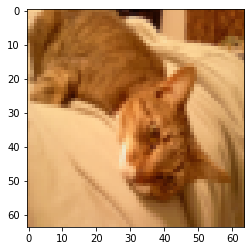

In [ ]:
plt.imshow(test_set_x[:,1].reshape((num_px, num_px, 3)))
predicted_value = Y_prediction_test[0][1]
print("Predicted as:",classes[int(predicted_value)].decode('utf-8'))
predicted_value

Predicted as: non-cat


0.0

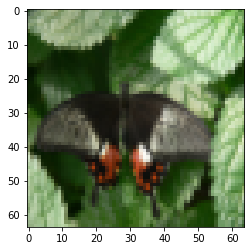

In [ ]:
plt.imshow(test_set_x[:,2].reshape((num_px, num_px, 3)))
predicted_value = Y_prediction_test[0][2]
print("Predicted as:",classes[int(predicted_value)].decode('utf-8'))
predicted_value

##### Mis-classified Images:

Predicted as: non-cat


0.0

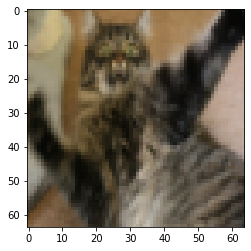

In [ ]:
plt.imshow(test_set_x[:,3].reshape((num_px, num_px, 3)))
predicted_value = Y_prediction_test[0][3]
print("Predicted as:",classes[int(predicted_value)].decode('utf-8'))
predicted_value

Predicted as: cat


1.0

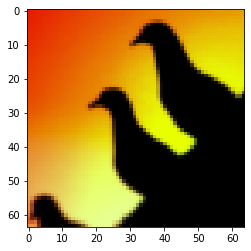

In [ ]:
plt.imshow(test_set_x[:,4].reshape((num_px, num_px, 3)))
predicted_value = Y_prediction_test[0][4]
print("Predicted as:",classes[int(predicted_value)].decode('utf-8'))
predicted_value